In [6]:
from utils.binaries import *
from utils.plotting import *

In [7]:
data = np.loadtxt("/cr/work/filip/SSDTriggerEfficiency/run01/DAT010002_0.csv")

In [8]:
example = data[:4]

In [9]:
wcd = example[:3, 5:]
ssd = example[3, 5:]

(0.0, 11656.5862357)

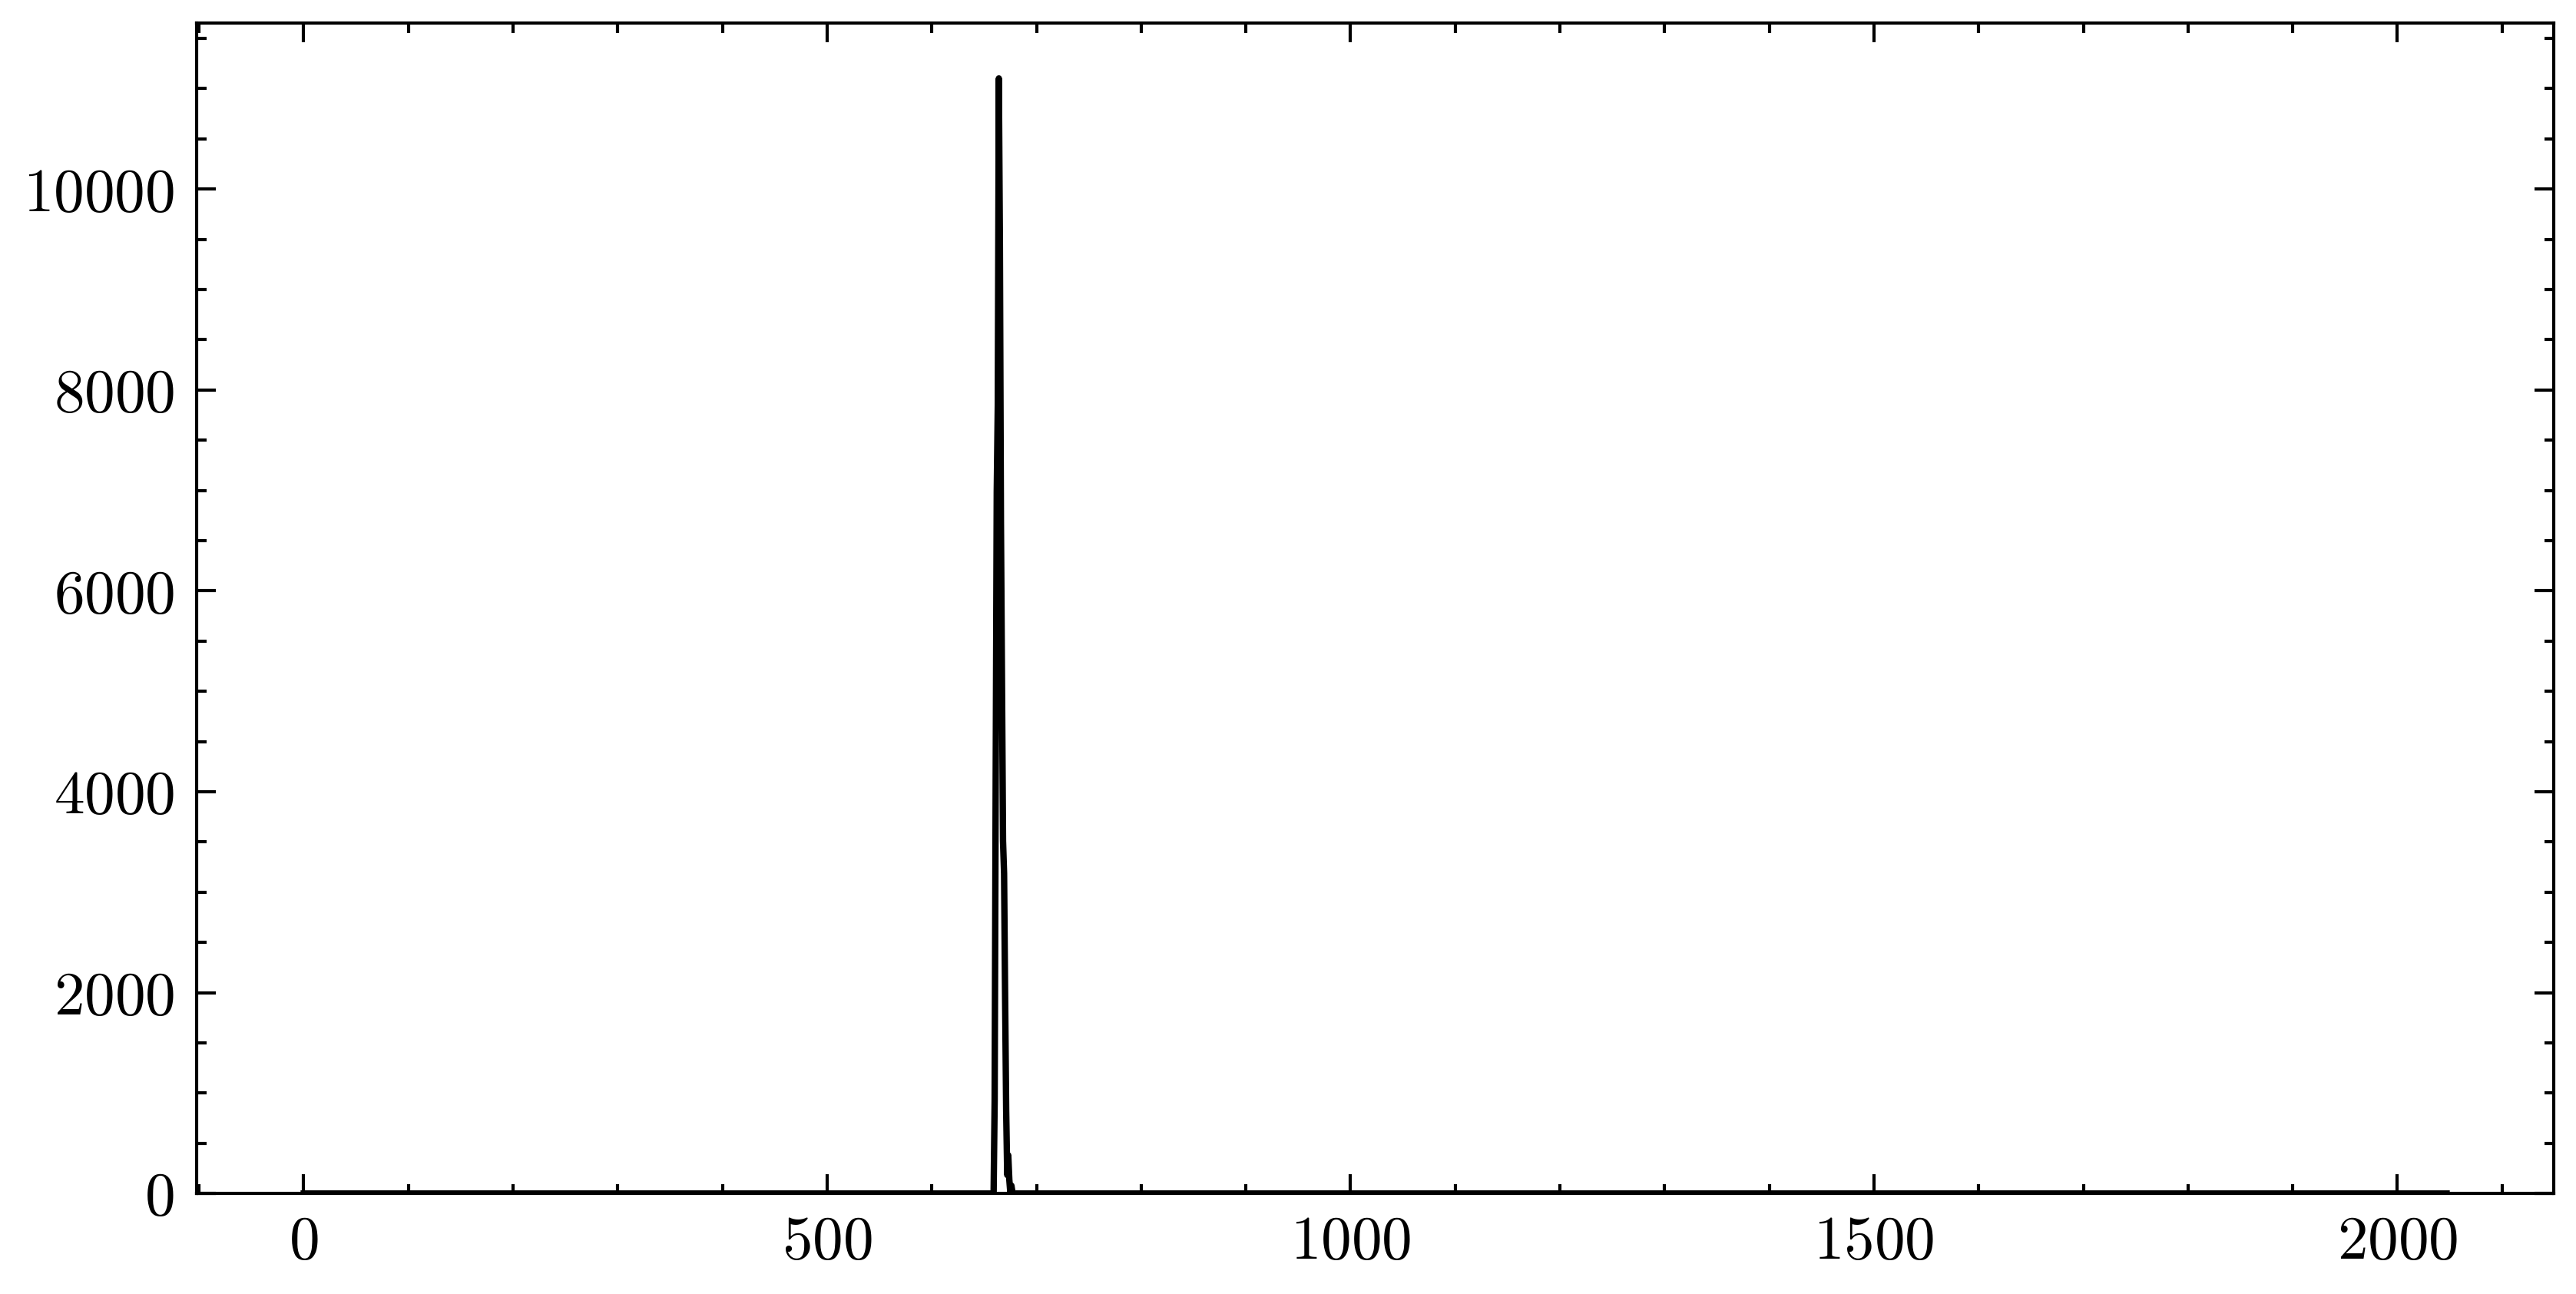

In [10]:
# plt.plot(range(2048), wcd[0])
# plt.plot(range(2048), wcd[1])
# plt.plot(range(2048), wcd[2])
plt.plot(range(2048), ssd)

plt.ylim(0)